In [1]:
import pandas as pd
happiness2015 = pd.read_csv('World_Happiness_2015.csv')

first_5 = happiness2015.head(5)
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [2]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

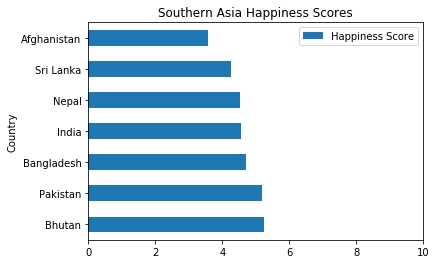

In [4]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

In [5]:
#get the mean happiness scores for each region
mean_happiness = {}
regions = happiness2015['Region'].unique()
for region in regions:
    region_group = happiness2015[happiness2015['Region'] == region]
    mean = region_group['Happiness Score'].mean()
    mean_happiness[region] = mean

In [6]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

# use df.groupby to group data

In [7]:
#df.groupby to group data by a chosen column
grouped = happiness2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')

In [8]:
#returns a dictionary of region: indices of the corresponding rows
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [12]:
grouped = happiness2015.groupby('Region')
north_america = happiness2015.iloc[[4,14]]
na_group = grouped.get_group('North America')
equal = north_america == na_group


In [13]:
print(equal)

    Country  Region  Happiness Rank  Happiness Score  Standard Error  \
4      True    True            True             True            True   
14     True    True            True             True            True   

    Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
4                       True    True                      True     True   
14                      True    True                      True     True   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
4                            True        True               True  
14                           True        True               True  


In [17]:
size = grouped.size()
means = grouped.mean()

In [18]:
print(means)

                                 Happiness Rank  Happiness Score  \
Region                                                             
Australia and New Zealand              9.500000         7.285000   
Central and Eastern Europe            79.000000         5.332931   
Eastern Asia                          64.500000         5.626167   
Latin America and Caribbean           46.909091         6.144682   
Middle East and Northern Africa       77.600000         5.406900   
North America                         10.000000         7.273000   
Southeastern Asia                     81.222222         5.317444   
Southern Asia                        113.142857         4.580857   
Sub-Saharan Africa                   127.900000         4.202800   
Western Europe                        29.523810         6.689619   

                                 Standard Error  Economy (GDP per Capita)  \
Region                                                                      
Australia and New Zealand    

In [16]:
print(size)

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64


In [19]:
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()

In [20]:
print(happy_mean)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


In [22]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']


# perform two aggregates at once with GroupBy.agg(func1, func2, ...)

In [23]:
happy_mean_max = happy_grouped.agg([np.mean, np.max])

In [24]:
print(happy_mean_max)

                                     mean   amax
Region                                          
Australia and New Zealand        7.285000  7.286
Central and Eastern Europe       5.332931  6.505
Eastern Asia                     5.626167  6.298
Latin America and Caribbean      6.144682  7.226
Middle East and Northern Africa  5.406900  7.278
North America                    7.273000  7.427
Southeastern Asia                5.317444  6.798
Southern Asia                    4.580857  5.253
Sub-Saharan Africa               4.202800  5.477
Western Europe                   6.689619  7.587


In [30]:
def dif(group):
    return (group.max() - group.mean())

In [25]:
mean_max_dif = happy_grouped.agg(dif)
print(mean_max_dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64


In [26]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()

In [27]:
#happiness_means is indexed by the region
print(happiness_means['Eastern Asia'])

5.626166666666666


# Doing the same shit with df.pivot_table()

In [29]:
#note: default aggfunc is mean
#setting margins = True adds the 'All' region, which aggregates the whole column
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
print(pv_happiness)

                                 Happiness Score
Region                                          
Australia and New Zealand               7.285000
Central and Eastern Europe              5.332931
Eastern Asia                            5.626167
Latin America and Caribbean             6.144682
Middle East and Northern Africa         5.406900
North America                           7.273000
Southeastern Asia                       5.317444
Southern Asia                           4.580857
Sub-Saharan Africa                      4.202800
Western Europe                          6.689619
All                                     5.375734


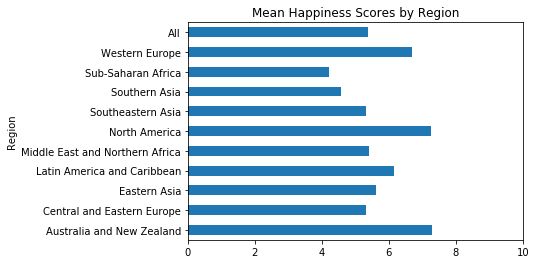

In [31]:
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

In [32]:
world_mean_happiness = happiness2015['Happiness Score'].mean()

print(world_mean_happiness)
print(pv_happiness.loc['All'][0])

5.3757341772151905
5.3757341772151905


# group by

In [35]:
cols = ['Happiness Score','Family']
grouped = happiness2015.groupby('Region')[cols]
funcs = [np.mean, np.min , np.max]
happy_family_stats = grouped.agg(funcs)
print(happy_family_stats)

                                Happiness Score                  Family  \
                                           mean   amin   amax      mean   
Region                                                                    
Australia and New Zealand              7.285000  7.284  7.286  1.314450   
Central and Eastern Europe             5.332931  4.218  6.505  1.053042   
Eastern Asia                           5.626167  4.874  6.298  1.099427   
Latin America and Caribbean            6.144682  4.518  7.226  1.104720   
Middle East and Northern Africa        5.406900  3.006  7.278  0.920490   
North America                          7.273000  7.119  7.427  1.284860   
Southeastern Asia                      5.317444  3.819  6.798  0.940468   
Southern Asia                          4.580857  3.575  5.253  0.645321   
Sub-Saharan Africa                     4.202800  2.839  5.477  0.809085   
Western Europe                         6.689619  4.857  7.587  1.247302   

                        

# pivot table

In [37]:
pv_happy_family_stats = happiness2015.pivot_table(cols, 'Region', aggfunc = funcs, margins = True)
print(pv_happy_family_stats)

                                     mean                     amin  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.30923   
Central and Eastern Europe       1.053042        5.332931  0.38562   
Eastern Asia                     1.099427        5.626167  0.94675   
Latin America and Caribbean      1.104720        6.144682  0.74302   
Middle East and Northern Africa  0.920490        5.406900  0.47489   
North America                    1.284860        7.273000  1.24711   
Southeastern Asia                0.940468        5.317444  0.62736   
Southern Asia                    0.645321        4.580857  0.30285   
Sub-Saharan Africa               0.809085        4.202800  0.00000   
Western Europe                   1.247302        6.689619  0.89318   
All                              0.991046        5.375734  0.00000   

                   

# Mission 2: Combining data with pandas

In [49]:
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

- pandas.concat() is an outer join, on either axis

In [40]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016])
print(concat_axis0)

       Country  Happiness Score  Year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016


In [41]:
concat_ignore_index = pd.concat([head_2015, head_2016], ignore_index=True)
print(concat_ignore_index)

       Country  Happiness Score  Year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015
3      Denmark            7.526  2016
4  Switzerland            7.509  2016
5      Iceland            7.501  2016


# pandas.merge() to combine data horizontally only

In [42]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

In [44]:
merged = pd.merge(left = three_2015, right = three_2016, on = 'Country')

- the key (Country) must appear in both dataframes by default
- this is an inner join

In [45]:
print(merged)

  Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Norway                 4    2015                 4    2016


In [46]:
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how = 'left')
print(merged_left)

   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN


In [47]:
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015', '_2016'))
print(merged_suffixes)

   Country  Happiness Rank_2015  Year_2015  Happiness Rank_2016  Year_2016
0  Denmark                    3       2015                  NaN        NaN
1   Norway                    4       2015                  4.0     2016.0
2   Canada                    5       2015                  NaN        NaN


In [48]:
#merge using the index
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
print(merge_index)

  Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   

   Happiness Rank_2016  Year_2016  
2                    3       2016  
3                    4       2016  
4                    5       2016  


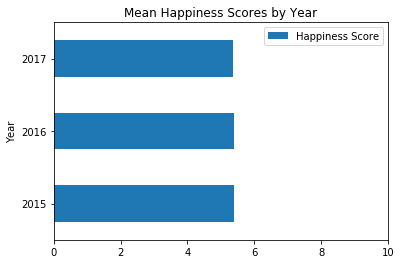

In [50]:
combined = pd.concat([happiness2015,happiness2016,happiness2017])
column = 'Happiness Score'
indexedBy = 'Year'
pivot_table_combined = combined.pivot_table(values = column, index = indexedBy) 
pivot_table_combined.plot(kind='barh',title='Mean Happiness Scores by Year',xlim=(0,10))

# Transforming data with pandas

In [51]:
#renaming some columns
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

happiness2015 = happiness2015.rename(mapping, axis=1)

In [52]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

economy_impact_map = happiness2015['Economy'].map(label)

economy_impact_apply = happiness2015['Economy'].apply(label)

equal = economy_impact_map.equals(economy_impact_apply)

In [53]:
#passing a func with another argument to series.apply(), doesn't work with series.map()
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label, x=.8)

In [57]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

factors_impact = happiness2015[factors].applymap(label)
print(factors_impact)

    Economy Family Health Freedom Trust Generosity
0      High   High    Low     Low   Low        Low
1      High   High    Low     Low   Low        Low
2      High   High    Low     Low   Low        Low
3      High   High    Low     Low   Low        Low
4      High   High    Low     Low   Low        Low
..      ...    ...    ...     ...   ...        ...
153     Low    Low    Low     Low   Low        Low
154     Low    Low    Low     Low   Low        Low
155     Low    Low    Low     Low   Low        Low
156     Low    Low    Low     Low   Low        Low
157     Low    Low    Low     Low   Low        Low

[158 rows x 6 columns]


In [58]:
#df.apply(), applies func to each column sequentially 
#must use a func that operates on a series, not one that works element-wise
#(like label())
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


In [63]:
def v_counts(col):
    #series with counts of unique vals
    num = col.value_counts()
    #the number of rows in col
    den = col.size
    #return series with percentages of unique vals
    return num/den

#apply() loops through rows so is slower than a vectorized func
#(one that applies to whole series at once)
v_counts_pct = factors_impact.apply(v_counts)
print(v_counts_pct)

       Economy    Family    Health  Freedom  Trust  Generosity
High  0.417722  0.563291  0.012658      NaN    NaN         NaN
Low   0.582278  0.436709  0.987342      1.0    1.0         1.0


In [65]:
#get the percentage that each factor plays in overall happiness score
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col/happiness2015['Happiness Score']
    div *= 100
    return div

factor_percentages = happiness2015[factors].apply(percentages)
print(factor_percentages)

       Economy     Family     Health    Freedom      Trust  Generosity  \
0    18.406617  17.787136  12.408462   8.772506   5.532885    3.911691   
1    17.224177  18.545563  12.535908   8.315963   1.870784    5.770401   
2    17.609672  18.075993  11.620035   8.627342   6.424472    4.535539   
3    19.396437  17.694097  11.768280   8.903616   4.852832    4.613002   
4    17.857681  17.808132  12.193753   8.522553   4.437458    6.168170   
..         ...        ...        ...        ...        ...         ...   
153   6.409235  22.329004  12.370563  17.085426  15.928139    6.530447   
154   8.582335  10.594611   9.553892  14.505988   2.398204    5.467066   
155  22.062542  15.798071  24.016301   5.217565   6.289421   15.694943   
156   0.526678  14.315663   7.709466   4.079174   3.463683    6.790706   
157   7.350476   4.929553  10.018669  12.840085   3.779852    5.875660   

     Dystopia Residual  
0            33.180177  
1            35.736146  
2            33.108011  
3          

# use pandas.melt() func to put all values for different factors into 1 column
- so that we can use vectorization on that column to turn everything into a percent

In [67]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors)

melt['Percentage'] = (melt['value'] / melt['Happiness Score'] * 100).round(2)
print(melt)

          Country                           Region  Happiness Rank  \
0     Switzerland                   Western Europe               1   
1         Iceland                   Western Europe               2   
2         Denmark                   Western Europe               3   
3          Norway                   Western Europe               4   
4          Canada                    North America               5   
...           ...                              ...             ...   
1101       Rwanda               Sub-Saharan Africa             154   
1102        Benin               Sub-Saharan Africa             155   
1103        Syria  Middle East and Northern Africa             156   
1104      Burundi               Sub-Saharan Africa             157   
1105         Togo               Sub-Saharan Africa             158   

      Happiness Score           variable    value  Percentage  
0               7.587            Economy  1.39651       18.41  
1               7.561          

# take melted df, use df.pivot_table() to get mean values indexed by 'variable', use df.plot() to make pie chart

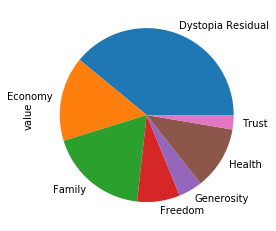

In [68]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

pv_melt = melt.pivot_table(index = 'variable', values = 'value')

pv_melt.plot(kind='pie', y='value', legend=False)

# summary of this mission:

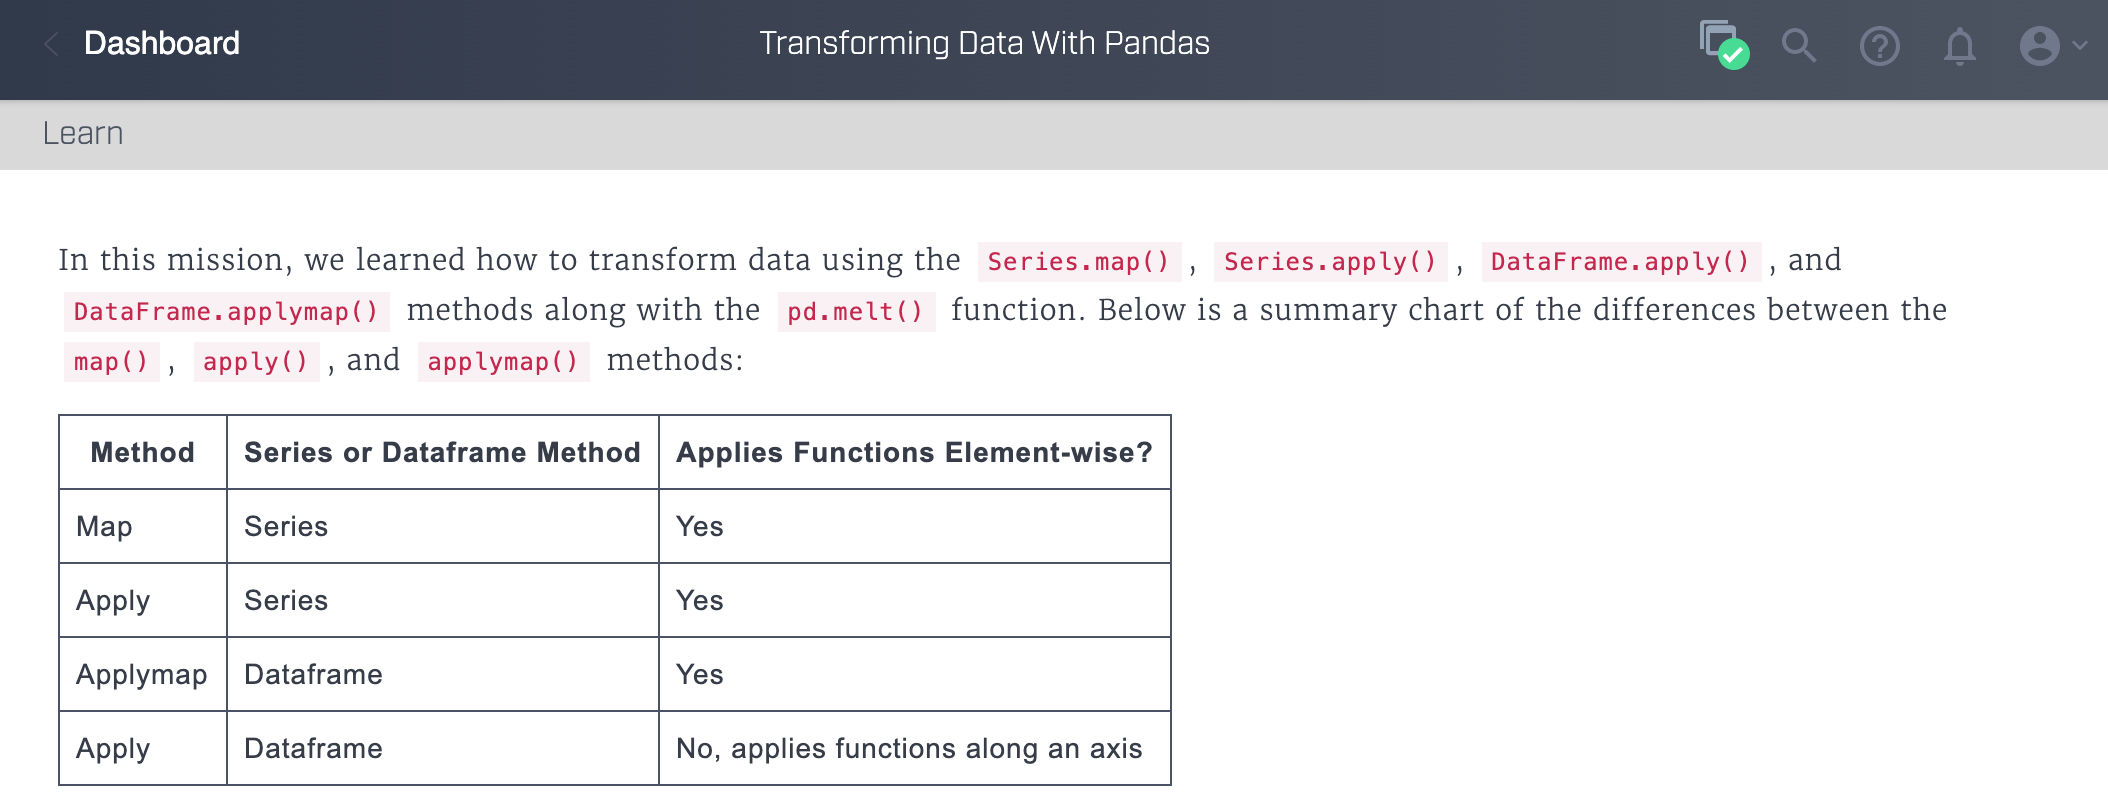

# Working with strings in pandas

In [71]:
world_dev = pd.read_csv("World_dev.csv")
print(world_dev.columns)

Index(['CountryCode', 'ShortName', 'TableName', 'LongName', 'Alpha2Code',
       'CurrencyUnit', 'SpecialNotes', 'Region', 'IncomeGroup', 'Wb2Code',
       'NationalAccountsBaseYear', 'NationalAccountsReferenceYear',
       'SnaPriceValuation', 'LendingCategory', 'OtherGroups',
       'SystemOfNationalAccounts', 'AlternativeConversionFactor',
       'PppSurveyYear', 'BalanceOfPaymentsManualInUse',
       'ExternalDebtReportingStatus', 'SystemOfTrade',
       'GovernmentAccountingConcept', 'ImfDataDisseminationStandard',
       'LatestPopulationCensus', 'LatestHouseholdSurvey',
       'SourceOfMostRecentIncomeAndExpenditureData',
       'VitalRegistrationComplete', 'LatestAgriculturalCensus',
       'LatestIndustrialData', 'LatestTradeData', 'LatestWaterWithdrawalData'],
      dtype='object')


In [74]:
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country',right_on='ShortName')
merged = merged.rename(col_renaming, axis=1)
merged

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,...,Budgetary central government,General Data Dissemination System (GDDS),2012,"Malaria Indicator Survey (MIS), 2013","Integrated household survey (IHS), 2010/11",NaN,2008,NaN,2013.0,2000.0
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,...,Budgetary central government,General Data Dissemination System (GDDS),2013,"Multiple Indicator Cluster Survey (MICS), 2014",Core Welfare Indicator Questionnaire Survey (C...,NaN,2011/12,NaN,2013.0,2001.0
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,...,Consolidated central government,General Data Dissemination System (GDDS),2008,"Malaria Indicator Survey (MIS), 2012",Core Welfare Indicator Questionnaire Survey (C...,NaN,NaN,2010.0,2012.0,2000.0


In [75]:
#get the last word of currency unit
def extract_last_word(element):
    element = str(element)
    words = element.split()
    return words[-1]

c_unit = merged['CurrencyUnit']
merged['Currency Apply'] = c_unit.apply(extract_last_word)

In [76]:
#use vectorized method instead, faster and more performant
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)

In [77]:
#string lengths. Vectorized method excludes null values
lengths = merged['CurrencyUnit'].str.len()
value_counts = lengths.value_counts(dropna=False)

In [85]:
#use regex to search for 'National accounts' or 'national accounts'
pattern = r"[Nn]ational accounts"
#if the element is null, the value in resulting series is set to False
national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)
national_accounts.value_counts(dropna=False)

False    104
True      54
Name: SpecialNotes, dtype: int64

In [89]:
merged_national_accounts = merged[national_accounts]
merged_national_accounts

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,...,2010,"World Health Survey (WHS), 2003",NaN,NaN,2012,2010.0,2011.0,2005.0,dirham,dirham
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,...,2010,"National Health Survey (NHS), 2010",NaN,Yes,NaN,2011.0,2013.0,1975.0,dollar,dollar
31,Uruguay,Latin America and Caribbean,32,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,...,2011,"Multiple Indicator Cluster Survey (MICS), 2012/13","Integrated household survey (IHS), 2013",Yes,2011,2009.0,2013.0,2000.0,peso,peso
33,Thailand,Southeastern Asia,34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,...,2010,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 2011",NaN,2013,2006.0,2013.0,2007.0,baht,baht
38,Kuwait,Middle East and Northern Africa,39,6.295,0.04456,1.55422,1.16594,0.72492,0.55499,0.25609,...,2011,"Family Health Survey (FHS), 1996",NaN,Yes,NaN,2011.0,2013.0,2002.0,dinar,dinar


In [90]:
#extract the entries with a year in it using regex
pattern =r"([1-2][0-9][0-9][0-9])"
years = merged['SpecialNotes'].str.extract(pattern)
years

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


In [91]:
#use expand=True to return a dataframe
years = merged['SpecialNotes'].str.extract(pattern, expand=True)
years

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


In [92]:
#set country column as index
merged = merged.set_index('Country')

In [93]:
#Years is a named capturing group
pattern = r"(?P<Years>[1-2][0-9]{3})"

In [96]:
years = merged['IESurvey'].str.extractall(pattern)
value_counts = years['Years'].value_counts()
value_counts
years

,,Years
Country,match,
Switzerland,0,2004
Iceland,0,2010
Denmark,0,2010
Norway,0,2010
Canada,0,2010
...,...,...
Afghanistan,0,2008
Rwanda,0,2010
Benin,0,2011


In [99]:
#? after the pattern indicates that a match is optional
#search for cases like 2018/19
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"

years = merged['IESurvey'].str.extractall(pattern)
#get the first 2 digits of the first year
first_two_year = years['First_Year'].str[0:2]
#put those first 2 digits at beginning of second year
years['Second_Year'] = first_two_year + years['Second_Year']
years

,,First_Year,Second_Year
Country,match,,
Switzerland,0,2004,NaN
Iceland,0,2010,NaN
Denmark,0,2010,NaN
Norway,0,2010,NaN
Canada,0,2010,NaN
...,...,...,...
Afghanistan,0,2008,NaN
Rwanda,0,2010,2011
Benin,0,2011,2012


In [100]:
#clean income group column
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
merged['IncomeGroup']

Country
Switzerland    HIGH OECD
Iceland        HIGH OECD
Denmark        HIGH OECD
Norway         HIGH OECD
Canada         HIGH OECD
                 ...    
Rwanda               LOW
Benin                LOW
Syria                NaN
Burundi              LOW
Togo                 LOW
Name: IncomeGroup, Length: 158, dtype: object

In [101]:
#get the mean happiness score per income group
pv_incomes = merged.pivot_table(index='IncomeGroup', values='Happiness Score')

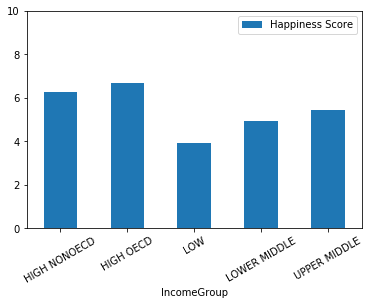

In [102]:
pv_incomes.plot(kind='bar',rot=30,ylim=(0,10))

# Working With Missing And Duplicate Data

In [104]:
#these are reshaped to all include the same countries, but with null vals for added countries
happiness2015 = pd.read_csv('wh_2015.csv')
happiness2016 = pd.read_csv('wh_2016.csv')
happiness2017 = pd.read_csv('wh_2017.csv')

In [105]:
happiness2015.shape

(164, 13)

In [106]:
happiness2016.shape

(164, 14)

In [107]:
happiness2017.shape

(164, 13)

In [108]:
missing = happiness2015['Happiness Score'].isnull()
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [109]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [110]:
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()

In [111]:
missing_2016

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [112]:
missing_2017

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

In [113]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)

In [116]:
combined.shape

(492, 23)

In [117]:
combined.isnull().sum()

Country                            0
Region                           177
Happiness Rank                   177
Happiness Score                  177
Standard Error                   334
Economy (GDP per Capita)         177
Family                            22
Health (Life Expectancy)         177
Freedom                           22
Trust (Government Corruption)    177
Generosity                        22
Dystopia Residual                177
Year                               0
Lower Confidence Interval        335
Upper Confidence Interval        335
Happiness.Rank                   337
Happiness.Score                  337
Whisker.high                     337
Whisker.low                      337
Economy..GDP.per.Capita.         337
Health..Life.Expectancy.         337
Trust..Government.Corruption.    337
Dystopia.Residual                337
dtype: int64

# need to clean the column names, then recombine

In [119]:
def clean(cols):
    cols = cols.str.replace('.', ' ').str.replace('(','').str.replace(')','').str.replace('\s+', ' ').str.strip().str.upper()
    return cols

happiness2015.columns = clean(happiness2015.columns)
happiness2016.columns = clean(happiness2016.columns)
happiness2017.columns = clean(happiness2017.columns)

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)

missing = combined.isnull().sum()
missing

COUNTRY                          0
REGION                         177
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
dtype: int64

# Seaborn heatmap

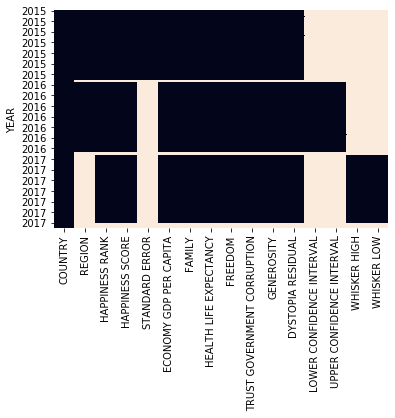

In [120]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

In [121]:
combined_updated

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
YEAR,,,,,,,,,,,,,,,,
2015,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN,NaN,NaN
2015,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN,NaN,NaN
2015,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN,NaN,NaN
2015,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN,NaN,NaN
2015,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
#all regions from 2017 are missing
bool2017 = combined['YEAR'] == 2017
regions_2017 = combined[bool2017]['REGION']
missing = regions_2017.isnull().sum()
missing

164

In [125]:
regions = happiness2015[['COUNTRY','REGION']]
regions

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
159,Namibia,NaN
160,Puerto Rico,NaN
161,Somalia,NaN
162,Somaliland Region,NaN


In [126]:
#note: regions should have no NaN vals for REGION, but I'm not gonna bother creating that df
combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')
#in the merge, REGION_x was the original regions column, REGION_y is the combined
combined = combined.drop('REGION_x', axis=1)

missing = combined.isnull().sum()

In [127]:
combined

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
0,Switzerland,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,Western Europe
1,Iceland,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,Western Europe
2,Denmark,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,Western Europe
3,Norway,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,Western Europe
4,Canada,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean


In [131]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined[dups]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


In [132]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']


,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
90,SOMALILAND REGION,91.0,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN
260,SOMALILAND REGION,97.0,5.057,NaN,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801,2016,4.934,5.18,NaN,NaN,NaN
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


In [133]:
combined = combined.drop_duplicates(['COUNTRY','YEAR'])

In [134]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
90,SOMALILAND REGION,91.0,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
260,SOMALILAND REGION,97.0,5.057,NaN,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801,2016,4.934,5.18,NaN,NaN,NaN
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN


# dropping rows and columns

In [136]:
#drop these columns, they aren't needed and have lots of null values
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']
combined = combined.drop(columns_to_drop, axis=1)
missing = combined.isnull().sum()

KeyError: "['LOWER CONFIDENCE INTERVAL' 'STANDARD ERROR' 'UPPER CONFIDENCE INTERVAL'\n 'WHISKER HIGH' 'WHISKER LOW'] not found in axis"

In [137]:
missing

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION_y                       17
dtype: int64

# use dropna(axis = 0 or 1) to drop rows, columns

In [138]:
combined.notnull().sum().sort_values()

HAPPINESS RANK                 470
HAPPINESS SCORE                470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
HEALTH LIFE EXPECTANCY         470
FREEDOM                        470
TRUST GOVERNMENT CORRUPTION    470
GENEROSITY                     470
DYSTOPIA RESIDUAL              470
REGION_y                       472
COUNTRY                        489
YEAR                           489
dtype: int64

In [140]:
#drop any columns that have less than 159 non-null values
combined = combined.dropna(thresh=159, axis=1)

In [145]:
combined = combined.rename({'REGION_y':'REGION'},axis=1)
combined.isnull().sum()

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION                         17
dtype: int64

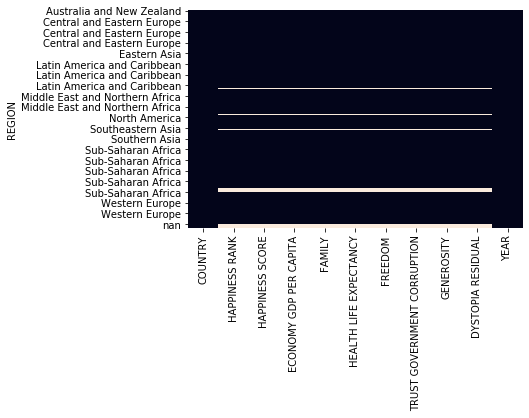

In [146]:
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)

# series.fillna() to fill missing values with a given value

In [147]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)

# look at the means for each region with pivot table

In [148]:
combined.pivot_table(index='REGION', values='HAPPINESS SCORE', margins=True)

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.057631
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.122209


In [149]:
#drop all rows with missing values
combined = combined.dropna()
missing = combined.isnull().sum()

In [150]:
missing

COUNTRY                        0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
HEALTH LIFE EXPECTANCY         0
FREEDOM                        0
TRUST GOVERNMENT CORRUPTION    0
GENEROSITY                     0
DYSTOPIA RESIDUAL              0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64